In [16]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# === SHOW ALL COLUMNS ===
pd.set_option('display.max_columns', None)


In [17]:
import os
from google.colab import files
#upload files
print("Please upload dataset.")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(f"✅ Uploaded and loaded '{file_name}' successfully!")

df.head()


Please upload dataset.


Saving creditcard.csv to creditcard (1).csv
✅ Uploaded and loaded 'creditcard (1).csv' successfully!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Basic info
df.info()
print("\nShape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

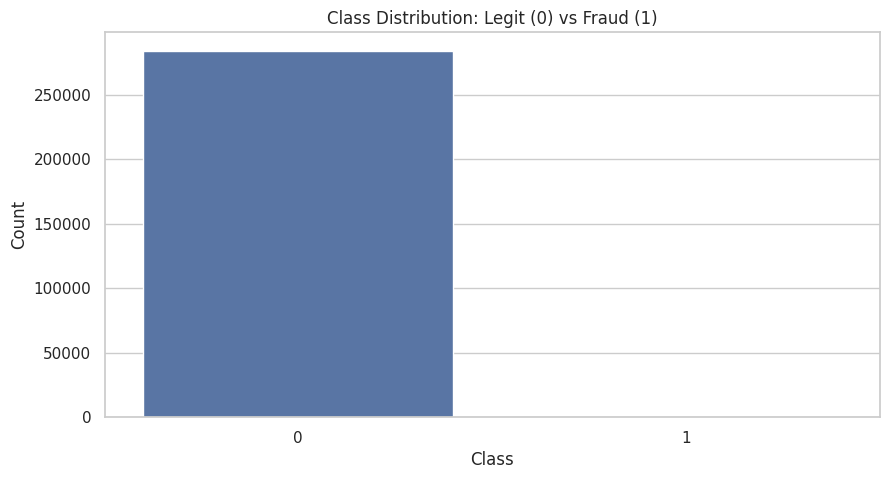

Fraud ratio: 0.1727%


In [19]:
# Fraud vs Non-fraud
fraud_counts = df['Class'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Class Distribution: Legit (0) vs Fraud (1)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

fraud_ratio = fraud_counts[1] / fraud_counts.sum() * 100
print(f"Fraud ratio: {fraud_ratio:.4f}%")


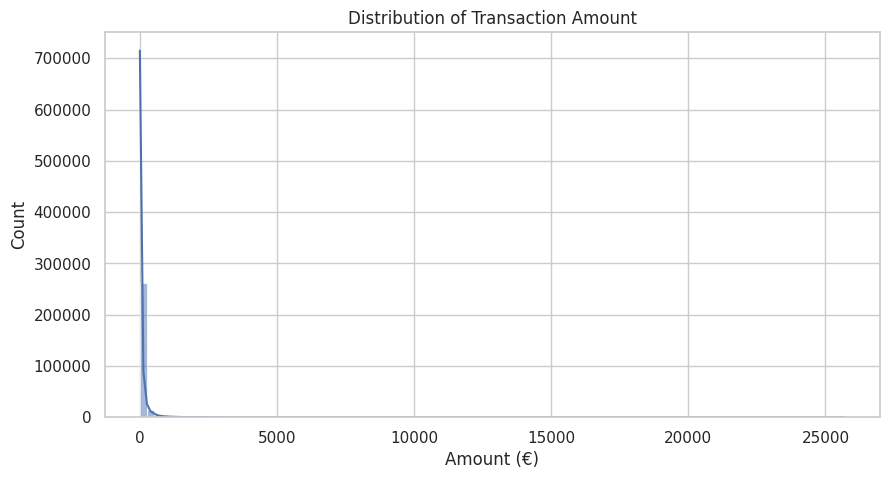

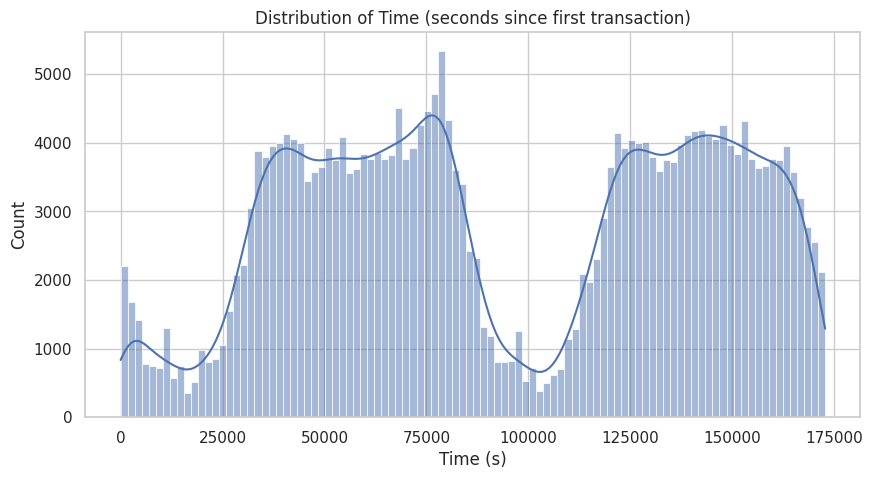

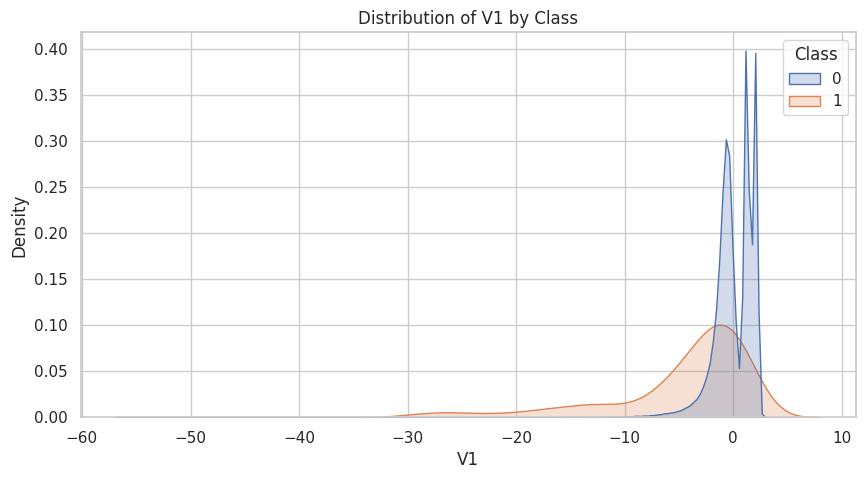

In [20]:
# 💵 Amount distribution
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount (€)")
plt.show()

# ⏰ Time distribution
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Distribution of Time (seconds since first transaction)")
plt.xlabel("Time (s)")
plt.show()

# ⚡ PCA Feature by Class
sns.kdeplot(data=df, x="V1", hue="Class", fill=True, common_norm=False)
plt.title("Distribution of V1 by Class")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Scale only 'Time' and 'Amount' (others already PCA)
scaler = StandardScaler()
for col in ['Time', 'Amount']:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col]  = scaler.transform(X_test[[col]])

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Fraud ratio train:", y_train.mean()*100, "%")


Train: (227845, 30) Test: (56962, 30)
Fraud ratio train: 0.17292457591783889 %


After SMOTE: Class
0    227451
1     45490
Name: count, dtype: int64


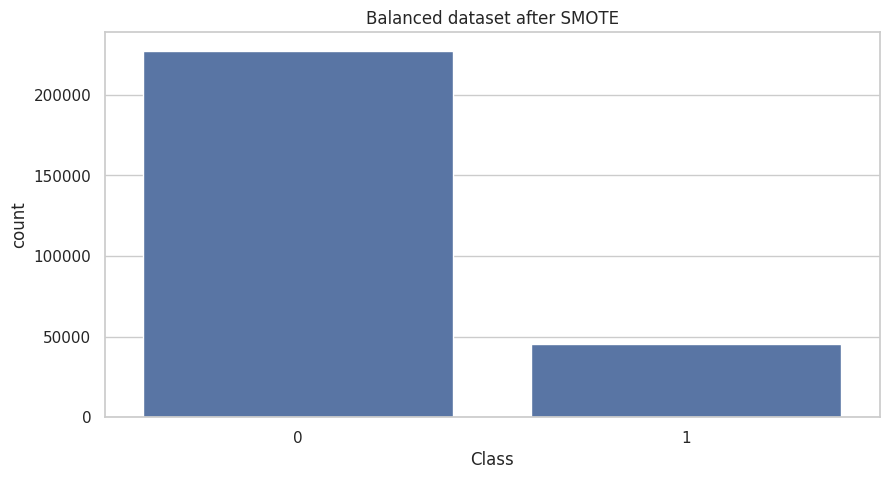

In [22]:
from imblearn.over_sampling import SMOTE

# Reduce aggressiveness (0.2 = 20% of majority)
smote = SMOTE(random_state=42, sampling_strategy=0.2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())
sns.countplot(x=y_train_res)
plt.title("Balanced dataset after SMOTE")
plt.show()


In [24]:
# === MODEL EVALUATION UTILITIES ===
# This cell defines AND confirms the functions are loaded correctly 👇

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    RocCurveDisplay, PrecisionRecallDisplay, fbeta_score
)

def evaluate_model(model, Xtr, ytr, Xte, yte, name=None, threshold=0.5):
    """
    Train a classification model and show key metrics + visualizations.
    - model: sklearn or XGBoost model with .fit() and .predict_proba()
    - threshold: probability cutoff for class 1 (fraud)
    """
    if name is None:
        name = model.__class__.__name__

    print(f"\n🚀 Training {name}...")
    model.fit(Xtr, ytr)
    proba = model.predict_proba(Xte)[:, 1]
    y_pred = (proba >= threshold).astype(int)

    # === METRICS ===
    print(f"\n=== {name} (threshold={threshold:.2f}) ===")
    print(classification_report(yte, y_pred, digits=4))
    print("ROC-AUC:", round(roc_auc_score(yte, proba), 4))

    # === CONFUSION MATRIX ===
    cm = confusion_matrix(yte, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # === ROC CURVE ===
    RocCurveDisplay.from_predictions(yte, proba)
    plt.title(f"ROC Curve — {name}")
    plt.show()

    # === PRECISION-RECALL CURVE ===
    PrecisionRecallDisplay.from_predictions(yte, proba)
    plt.title(f"Precision-Recall — {name}")
    plt.show()

    return proba


def find_best_threshold(y_true, proba, beta=2.0):
    """
    Find the best classification threshold maximizing the F-beta score.
    beta > 1 means we value Recall more than Precision.
    """
    ts = np.linspace(0.01, 0.99, 99)
    scores = [(t, fbeta_score(y_true, (proba>=t).astype(int), beta=beta)) for t in ts]
    best_t, best_s = max(scores, key=lambda x: x[1])
    print(f"✅ Best threshold for F{beta}: {best_t:.2f} (score={best_s:.4f})")
    return best_t


# === Confirm everything is loaded correctly ===
print("✅ Functions 'evaluate_model()' and 'find_best_threshold()' are ready to use!")


✅ Functions 'evaluate_model()' and 'find_best_threshold()' are ready to use!



🚀 Training Logistic Regression...

=== Logistic Regression (threshold=0.50) ===
              precision    recall  f1-score   support

           0     0.9998    0.9942    0.9970     56864
           1     0.2076    0.8878    0.3366        98

    accuracy                         0.9940     56962
   macro avg     0.6037    0.9410    0.6668     56962
weighted avg     0.9984    0.9940    0.9958     56962

ROC-AUC: 0.967


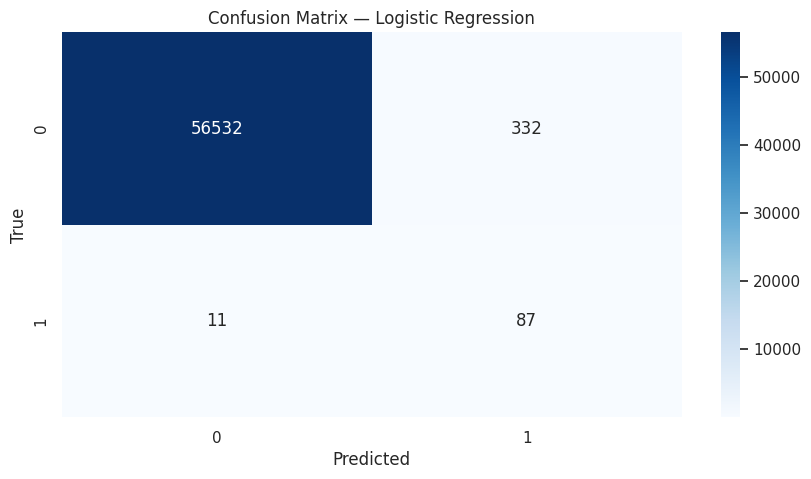

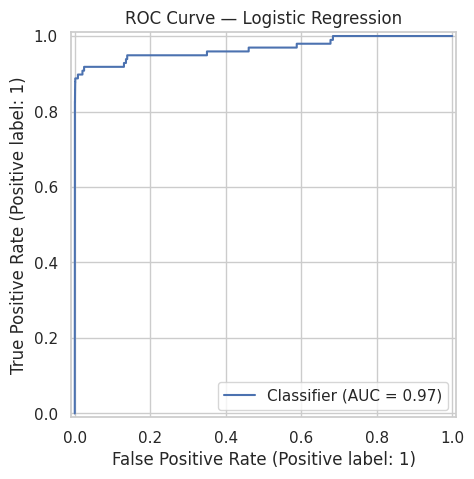

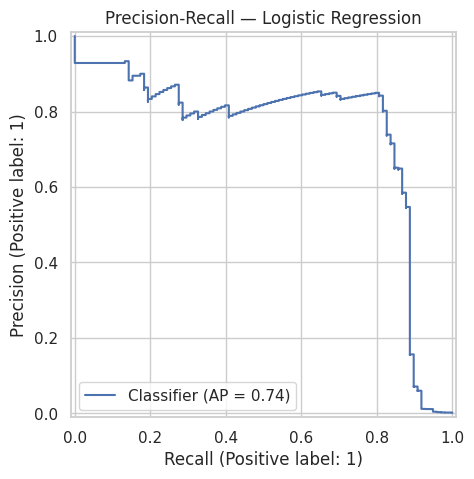

✅ Best threshold for F2.0: 0.99 (score=0.8169)

🚀 Training Logistic Regression (tuned)...

=== Logistic Regression (tuned) (threshold=0.99) ===
              precision    recall  f1-score   support

           0     0.9997    0.9994    0.9996     56864
           1     0.7155    0.8469    0.7757        98

    accuracy                         0.9992     56962
   macro avg     0.8576    0.9232    0.8876     56962
weighted avg     0.9992    0.9992    0.9992     56962

ROC-AUC: 0.967


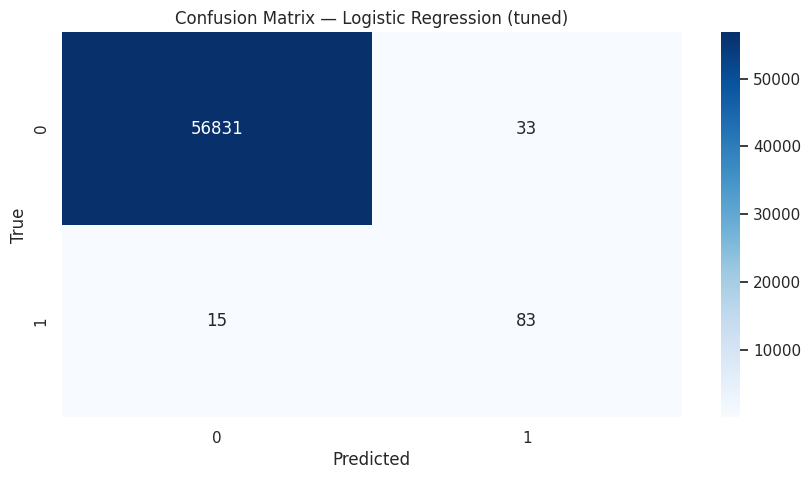

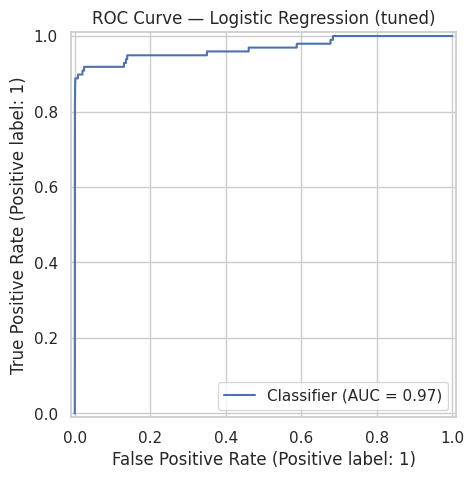

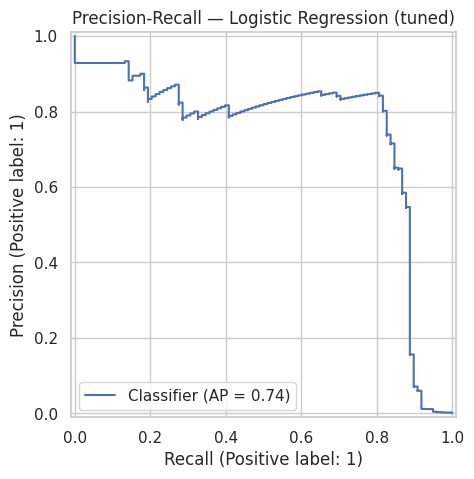

In [25]:
from sklearn.linear_model import LogisticRegression

# 🧱 Define baseline model
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)

# 🚀 Train & evaluate
proba_lr = evaluate_model(
    log_reg,
    X_train_res, y_train_res,
    X_test, y_test,
    name="Logistic Regression"
)

# 🎯 Find the optimal threshold (F2-score → Recall is more important)
t_star = find_best_threshold(y_test, proba_lr, beta=2.0)

# 🔁 Re-evaluate with tuned threshold
_ = evaluate_model(
    log_reg,
    X_train_res, y_train_res,
    X_test, y_test,
    name="Logistic Regression (tuned)",
    threshold=t_star
)



🚀 Training Random Forest...

=== Random Forest (threshold=0.50) ===
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7241    0.8571    0.7850        98

    accuracy                         0.9992     56962
   macro avg     0.8619    0.9283    0.8923     56962
weighted avg     0.9993    0.9992    0.9992     56962

ROC-AUC: 0.98


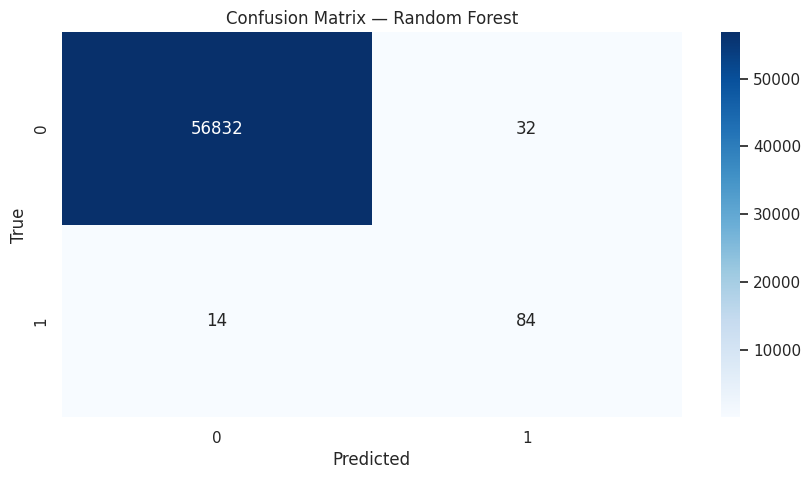

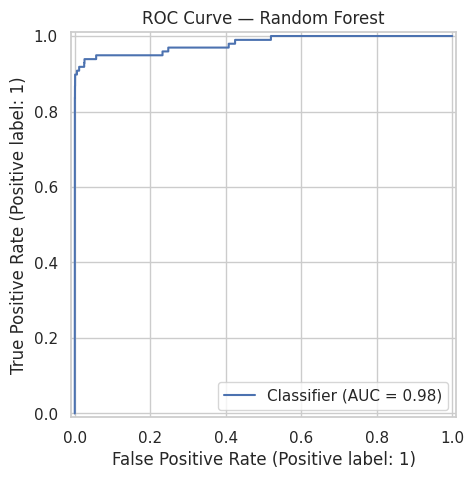

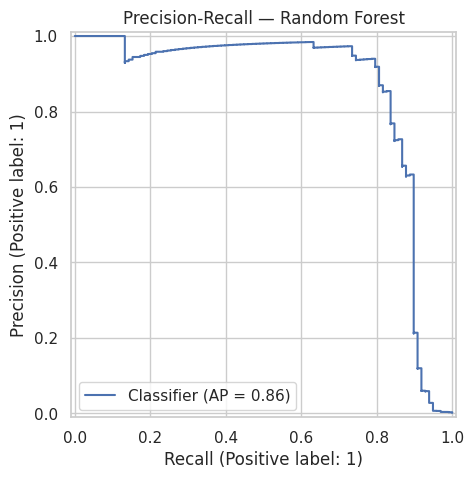

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 🌲 Random Forest (optimized for speed)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)

proba_rf = evaluate_model(
    rf,
    X_train_res, y_train_res,
    X_test, y_test,
    name="Random Forest"
)



🚀 Training XGBoost...

=== XGBoost (threshold=0.50) ===
              precision    recall  f1-score   support

           0     0.9998    0.9985    0.9991     56864
           1     0.5030    0.8571    0.6340        98

    accuracy                         0.9983     56962
   macro avg     0.7514    0.9278    0.8166     56962
weighted avg     0.9989    0.9983    0.9985     56962

ROC-AUC: 0.9777


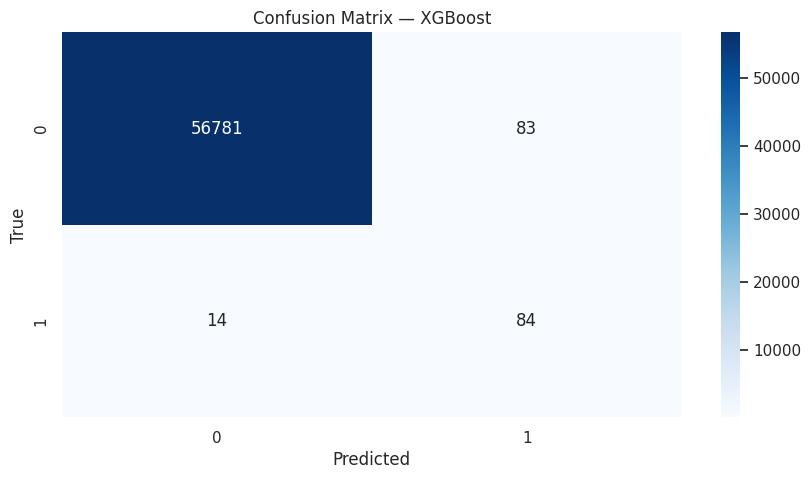

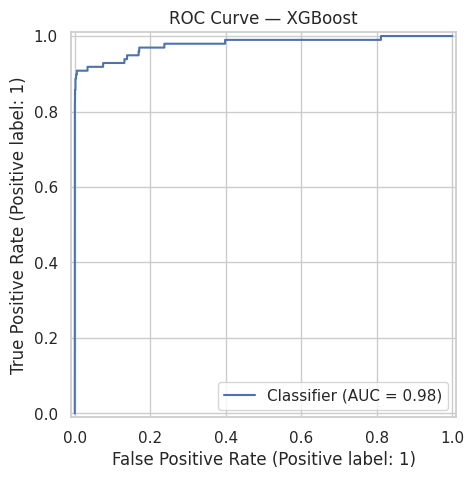

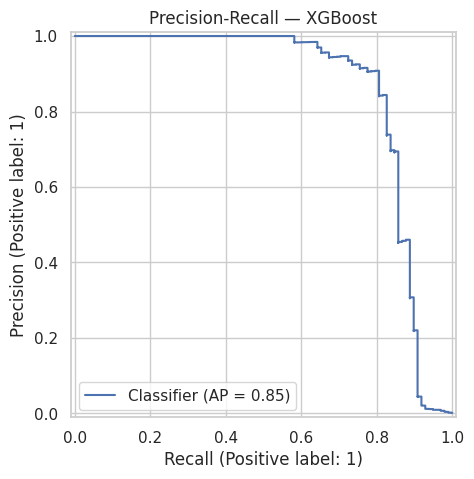

In [27]:
from xgboost import XGBClassifier

# ⚡ XGBoost tuned for balanced performance
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    n_jobs=-1,
    random_state=42,
    eval_metric="logloss"
)

proba_xgb = evaluate_model(
    xgb,
    X_train_res, y_train_res,
    X_test, y_test,
    name="XGBoost"
)


In [28]:
# Simple summary table
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "LogisticRegression": (log_reg, proba_lr),
    "RandomForest": (rf, proba_rf),
    "XGBoost": (xgb, proba_xgb),
}

summary = []
for name, (model, proba) in models.items():
    y_pred = (proba >= 0.5).astype(int)
    summary.append({
        "Model": name,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, proba)
    })

pd.DataFrame(summary).sort_values("AUC", ascending=False)


,Model,Precision,Recall,F1,AUC
1,RandomForest,0.724138,0.857143,0.785047,0.979961
2,XGBoost,0.502994,0.857143,0.633962,0.977715
0,LogisticRegression,0.207637,0.887755,0.336557,0.966987


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1'].plot(kind='hist', bins=20, title='F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall', y='F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='F1', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Recall']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Recall', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recall')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Recall']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Recall', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recall')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Recall']
  ys = series['F1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Recall', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recall')
_ = plt.ylabel('F1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Recall']
  ys = series['AUC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Recall', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recall')
_ = plt.ylabel('AUC')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['F1'].plot(kind='line', figsize=(8, 4), title='F1')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='F1', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)